In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import cv2
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_recall_fscore_support, roc_curve, auc, precision_score,recall_score, f1_score
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [233]:
cat_file_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat"
dog_file_path = "/kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog"

In [234]:
import plotly.express as px

class_names = ['Cat', 'Dog'] 
n_dogs = len(os.listdir(cat_file_path))
n_cats = len(os.listdir(dog_file_path))
n_images = [n_cats, n_dogs]

fig = px.bar(x=class_names, y=n_images, color=class_names, labels={'x': 'Class', 'y': 'Number of Images'}, title='Dog vs Cat')
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [160]:
data = []

In [161]:
print(data)

[]


In [162]:
for img in os.listdir(cat_file_path):
        img_path = os.path.join(cat_file_path, img)
        label = 0
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if arr is None:
            print(f"Error loading image: {img_path}")
        else:
            new_arr = cv2.resize(arr, (150, 150))
            data.append([new_arr, label])


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422


Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


1705
1706
1707
1708
1709
1710
1711
1712
1713
1714
1715
1716
1717
1718
1719
1720
1721
1722
1723
1724
1725
1726
1727
1728
1729
1730
1731
1732
1733
1734
1735
1736
1737
1738
1739
1740
1741
1742
1743
1744
1745
1746
1747
1748
1749
1750
1751
1752
1753
1754
1755
1756
1757
1758
1759
1760
1761
1762
1763
1764
1765
1766
1767
1768
1769
1770
1771
1772
1773
1774
1775
1776
1777
1778
1779
1780
1781
1782
1783
1784
1785
1786
1787
1788
1789
1790
1791
1792
1793
1794
1795
1796
1797
1798
1799
1800
1801
1802
1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904


Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623
5624
5625
5626
5627
5628
5629
5630
5631
5632
5633
5634
5635
5636
5637
5638
5639
5640
5641
5642
5643
5644
5645
5646
5647
5648
5649
5650
5651
5652
5653
5654
5655
5656
5657
5658
5659
5660
5661
5662
5663
5664
5665
5666
5667
5668
5669
5670
5671
5672
5673
5674
5675
5676
5677
5678
5679
5680
5681
5682
5683
5684
5685
5686
5687
5688
5689
5690
5691
5692
5693
5694
5695
5696
5697
5698
5699
5700
5701
5702
5703
5704
5705
5706
5707
5708
5709
5710
5711
5712
5713
5714
5715
5716
5717
5718
5719
5720
5721
5722
5723
5724
5725
5726
5727
5728


Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169
6170
6171
6172
6173
6174
6175
6176
6177
6178
6179
6180
6181
6182
6183
6184
6185
6186
6187
6188
6189
6190
6191
6192
6193
6194
6195
6196
6197
6198
6199
6200
6201
6202
6203
6204
6205
6206
6207
6208
6209
6210
6211
6212
6213
6214
6215
6216
6217
6218
6219
6220
6221
6222
6223
6224
6225
6226
6227
6228
6229
6230
6231
6232
6233
6234
6235
6236
6237
6238
6239
6240
6241
6242
6243
6244
6245
6246
6247
6248
6249
6250
6251
6252
6253
6254
6255
6256
6257
6258
6259
6260
6261
6262
6263
6264
6265
6266
6267
6268
6269
6270
6271
6272
6273
6274
6275
6276
6277
6278
6279
6280
6281
6282
6283
6284
6285
6286
6287
6288
6289
6290
6291
6292
6293
6294
6295
6296
6297
6298
6299
6300
6301
6302
6303
6304
6305
6306
6307
6308
6309
6310
6311
6312
6313
6314
6315
6316
6317
6318
6319
6320
6321
6322
6323
6324
6325
6326
6327
6328
6329
6330
6331
6332
6333


Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


9606
9607
9608
9609
9610
9611
9612
9613
9614
9615
9616
9617
9618
9619
9620
9621
9622
9623
9624
9625
9626
9627
9628
9629
9630
9631
9632
9633
9634
9635
9636
9637
9638
9639
9640
9641
9642
9643
9644
9645
9646
9647
9648
9649
9650
9651
9652
9653
9654
9655
9656
9657
9658
9659
9660
9661
9662
9663
9664
9665
9666
9667
9668
9669
9670
9671
9672
9673
9674
9675
9676
9677
9678
9679
9680
9681
9682
9683
9684
9685
9686
9687
9688
9689
9690
9691
9692
9693
9694
9695
9696
9697
9698
9699
9700
9701
9702
9703
9704
9705
9706
9707
9708
9709
9710
9711
9712
9713
9714
9715
9716
9717
9718
9719
9720
9721
9722
9723
9724
9725
9726
9727
9728
9729
9730
9731
9732
9733
9734
9735
9736
9737
9738
9739
9740
9741
9742
9743
9744
9745
9746
9747
9748
9749
9750
9751
9752
9753
9754
9755
9756
9757
9758
9759
9760
9761
9762
9763
9764
9765
9766
9767
9768
9769
9770
9771
9772
9773
9774
9775
9776
9777
9778
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Cat/666.jpg
9779
9780
9781
9782
9783
9784
9785
9786
9787
9788

In [163]:
for img in os.listdir(dog_file_path):
        img_path = os.path.join(dog_file_path, img)
        label = 1
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if arr is None:
            print(f"Error loading image: {img_path}")
        else:
            new_arr = cv2.resize(arr, (150, 150))
            data.append([new_arr, label])

Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6059.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11849.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3288.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6238.jpg


Corrupt JPEG data: 226 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2688.jpg


Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7112.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/8730.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11702.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7133.jpg


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11853.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7969.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7459.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10747.jpg


Corrupt JPEG data: 254 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/6718.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2877.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3136.jpg


Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11675.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/4367.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/Thumbs.db
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5604.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/9188.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/3588.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/11410.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1308.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10158.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/2384.jpg


Corrupt JPEG data: 399 extraneous bytes before marker 0xd9


Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/1866.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/7369.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10797.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/10401.jpg
Error loading image: /kaggle/input/microsoft-catsvsdogs-dataset/PetImages/Dog/5736.jpg


In [164]:
print(data[0])

[array([[ 90, 105,  79, ..., 108,  77,  15],
       [ 67,  76,  55, ...,  92,  97,  19],
       [157, 164, 124, ...,  72, 111,  28],
       ...,
       [196, 203, 217, ...,  66,  78, 121],
       [208, 226, 222, ...,  52, 105, 100],
       [204, 214, 229, ...,  37, 146,  70]], dtype=uint8), 0]


In [165]:
random.shuffle(data)

In [166]:
data[0]

[array([[  4,   9,   7, ...,   5,   4,   4],
        [  5,   9,   8, ...,   6,   4,   4],
        [  6,   8,   7, ...,   3,   4,   5],
        ...,
        [234, 234, 221, ..., 239, 240, 238],
        [235, 231, 219, ..., 241, 242, 240],
        [236, 232, 216, ..., 239, 240, 239]], dtype=uint8),
 1]

In [167]:
train_data,test_data  = train_test_split(data, train_size=0.8, random_state=42)

In [168]:
train_data[0]

[array([[ 37,  46,  49, ...,  54,  16,  72],
        [ 36,  45,  47, ...,  52,  29,  78],
        [ 37,  46,  45, ...,  49,  33,  66],
        ...,
        [129, 135, 136, ..., 130, 118, 110],
        [131, 135, 135, ..., 128, 116, 107],
        [133, 135, 133, ..., 127, 115, 107]], dtype=uint8),
 0]

In [169]:
len(test_data)

4990

In [170]:
test_data[0]

[array([[ 26,  26,  26, ..., 254, 248, 236],
        [ 26,  26,  26, ..., 254, 248, 236],
        [ 26,  26,  26, ..., 254, 248, 236],
        ...,
        [222, 222, 223, ..., 230, 230, 229],
        [222, 222, 222, ..., 230, 230, 229],
        [222, 222, 221, ..., 230, 230, 229]], dtype=uint8),
 1]

In [171]:
X_train = []
y_train = []

for features,labels in train_data:
    X_train.append(features)
    y_train.append(labels)

In [172]:
X_train[0]

array([[ 37,  46,  49, ...,  54,  16,  72],
       [ 36,  45,  47, ...,  52,  29,  78],
       [ 37,  46,  45, ...,  49,  33,  66],
       ...,
       [129, 135, 136, ..., 130, 118, 110],
       [131, 135, 135, ..., 128, 116, 107],
       [133, 135, 133, ..., 127, 115, 107]], dtype=uint8)

In [173]:
y_train[0]

0

In [174]:
X_test = []
y_test = []

for features,labels in test_data:
    X_test.append(features)
    y_test.append(labels)

In [175]:
X_test[0]

array([[ 26,  26,  26, ..., 254, 248, 236],
       [ 26,  26,  26, ..., 254, 248, 236],
       [ 26,  26,  26, ..., 254, 248, 236],
       ...,
       [222, 222, 223, ..., 230, 230, 229],
       [222, 222, 222, ..., 230, 230, 229],
       [222, 222, 221, ..., 230, 230, 229]], dtype=uint8)

In [176]:
y_test[0]

1

In [177]:
X_test = np.array(X_test)
y_test = np.array(y_test)
X_train = np.array(X_train)
y_test = np.array(y_test)

In [178]:
X_test.shape

(4990, 150, 150)

In [179]:
X_train.shape

(19956, 150, 150)

In [180]:
len(X_train)

19956

In [181]:
X_train = X_train.reshape((len(X_train), 150*150))
X_test = X_test.reshape((len(X_test), 150*150))

In [182]:
X_train.shape

(19956, 22500)

In [183]:
X_train = X_train/255
X_test = X_test/255

In [184]:
X_train[0]

array([0.14509804, 0.18039216, 0.19215686, ..., 0.49803922, 0.45098039,
       0.41960784])

In [185]:
def convert_to_categorical(labels, num_classes=2):
    one_hot_labels = np.zeros((len(labels), num_classes))

    for i, label in enumerate(labels):
        one_hot_labels[i, label] = 1

    return one_hot_labels

In [186]:
y_train = convert_to_categorical(y_train, 2)
y_test = convert_to_categorical(y_test, 2)

In [187]:
y_train[1]

array([0., 1.])

In [188]:
y_train.shape

(19956, 2)

In [189]:
y_test.shape

(4990, 2)

In [225]:
class ANN:
  def __init__(self):

    self.learning_rate = 0.01
    self.epochs = 5

    # Neural network architecture parameters
    self.input_size = 22500  # 150*150
    self.hidden_size = 5
    self.output_size = 2  # 10 classes for MNIST digits

    # Initialize weights and biases
    np.random.seed(42)
    self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
    self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
    self.bias_hidden = np.zeros((1, self.hidden_size))
    self.bias_output = np.zeros((1, self.output_size))

  def sigmoid(self,x):
    return 1 / (1 + np.exp(-x))

  def sigmoid_derivative(self,x):
      return x * (1 - x)

  def binary_cross_entropy(self,y_true, y_pred):
    # Avoid division by zero
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

  def train(self,x_train,y_train):
      # Training the network
      X_train = x_train
      y_train = y_train
      for e in range(self.epochs):
          total_loss = 0
          for i in range(len(X_train)):
              # Forward pass
              input_layer = np.array([X_train[i]])
              hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
              output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)
              # Backpropagation
              loss = self.binary_cross_entropy(y_test,output_layer)
              total_loss += loss
              output_error = y_train[i] - output_layer
              output_delta = output_error * self.sigmoid_derivative(output_layer)

              hidden_error = output_delta.dot(self.weights_hidden_output.T)
              hidden_delta = hidden_error * self.sigmoid_derivative(hidden_layer)

              # Update weights and biases
              self.weights_hidden_output += hidden_layer.T.dot(output_delta) * self.learning_rate
              self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
              self.weights_input_hidden += input_layer.T.dot(hidden_delta) * self.learning_rate
              self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
            
          # Output epoch results
          total_loss /= len(X_train)
          print(f"Epoch {e+1}/{self.epochs} loss - {total_loss}")

  def evaluate(self,X_test,y_test):
      # Evaluating the model
      correct_predictions = 0
      pred = []
      for i in range(len(X_test)):
          input_layer = np.array([X_test[i]])
          hidden_layer = self.sigmoid(np.dot(input_layer, self.weights_input_hidden) + self.bias_hidden)
          output_layer = self.sigmoid(np.dot(hidden_layer, self.weights_hidden_output) + self.bias_output)
          pred.append(output_layer)
          if np.argmax(output_layer) == np.argmax(y_test[i]):
              correct_predictions += 1

      print(f"Test accuracy: {correct_predictions / len(y_test)}")
      return pred

In [226]:
ann_model = ANN()

In [230]:
ann_model.train(X_train,y_train)

Epoch 1/5 loss - 0.6938050958905213
Epoch 2/5 loss - 0.6938007748101237
Epoch 3/5 loss - 0.6938030161082368
Epoch 4/5 loss - 0.6938190129345535
Epoch 5/5 loss - 0.6938855201288793


In [231]:
pred = ann_model.evaluate(X_test,y_test)

Test accuracy: 0.5122244488977956


In [229]:
pred = np.array(pred).squeeze()

In [216]:
top1_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print(f"Top-1 Accuracy: {top1_accuracy * 100:.2f}%")

top5_predictions = np.argsort(pred, axis=1)[:, -5:]
top5_accuracy = np.mean(np.any(top5_predictions == np.argmax(y_test, axis=1)[:, None], axis=1))
print(f"Top-5 Accuracy: {top5_accuracy * 100:.2f}%")

Top-1 Accuracy: 55.73%
Top-5 Accuracy: 100.00%


In [217]:
precision, recall, f1_score, _ = precision_recall_fscore_support(np.argmax(y_test, axis=1), np.argmax(pred, axis=1), average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Precision: 0.5667
Recall: 0.5573
F1-Score: 0.5381


In [218]:
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred, axis=1))
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[ 872 1604]
 [ 605 1909]]


In [219]:
num_classes = 2
TP = np.zeros(num_classes)
TN = np.zeros(num_classes)
FP = np.zeros(num_classes)
FN = np.zeros(num_classes)

for cls in range(num_classes):
    TP[cls] = conf_matrix[cls, cls]
    TN[cls] = np.sum(conf_matrix) - np.sum(conf_matrix[cls, :]) - np.sum(conf_matrix[:, cls]) + conf_matrix[cls, cls]
    FP[cls] = np.sum(conf_matrix[:, cls]) - conf_matrix[cls, cls]
    FN[cls] = np.sum(conf_matrix[cls, :]) - conf_matrix[cls, cls]

for cls in range(num_classes):
    print(f"Class {cls}:")
    print(f"  True Positives (TP): {TP[cls]}")
    print(f"  True Negatives (TN): {TN[cls]}")
    print(f"  False Positives (FP): {FP[cls]}")
    print(f"  False Negatives (FN): {FN[cls]}\n")


Class 0:
  True Positives (TP): 872.0
  True Negatives (TN): 1909.0
  False Positives (FP): 605.0
  False Negatives (FN): 1604.0

Class 1:
  True Positives (TP): 1909.0
  True Negatives (TN): 872.0
  False Positives (FP): 1604.0
  False Negatives (FN): 605.0



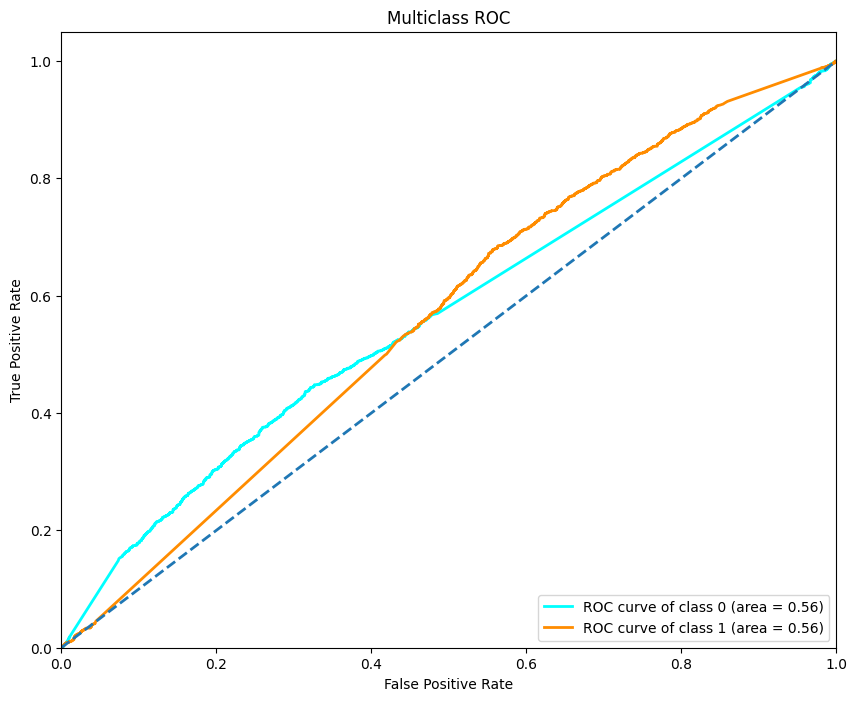

In [224]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
lw = 2
for i, color in zip(range(n_classes),['aqua', 'darkorange']):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], '--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC')
plt.legend(loc="lower right")
plt.show()